In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('infolimpioavanzadoTarget.csv')

In [95]:
df.shape

(7781, 1285)

In [96]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [98]:
df.isna().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [99]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15',
       ...
       'high-15', 'K-15', 'D-15', 'stochastic-k-15', 'stochastic-d-15',
       'stochastic-kd-15', 'volumenrelativo', 'diff', 'INCREMENTO', 'TARGET'],
      dtype='object', length=1285)

In [100]:
df.columns[:30]

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25',
       'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15',
       'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50',
       'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1',
       'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15',
       'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2',
       'MACDdif-volume-15-3'],
      dtype='object')

In [101]:
df.columns[-30:]

Index(['fuerzarelativaFlower0-5', 'fuerzarelativaFlower0-10', 'mfm', 'mfv',
       'adl', 'low-5', 'high-5', 'K-5', 'D-5', 'stochastic-k-5',
       'stochastic-d-5', 'stochastic-kd-5', 'low-10', 'high-10', 'K-10',
       'D-10', 'stochastic-k-10', 'stochastic-d-10', 'stochastic-kd-10',
       'low-15', 'high-15', 'K-15', 'D-15', 'stochastic-k-15',
       'stochastic-d-15', 'stochastic-kd-15', 'volumenrelativo', 'diff',
       'INCREMENTO', 'TARGET'],
      dtype='object')

In [102]:
imp_columns = [
    'date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
    'RSIadjclose15', 'MACDadjclose15', 'stochastic-k-5', 'volumenrelativo',
    'low-5', 'high-5', 'diff', 'INCREMENTO', 'TARGET'
]

In [103]:
dfn = pd.DataFrame()
for column in df.columns :
    if (column  in imp_columns):
        dfn[column] = df[column]

In [104]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,high-5,stochastic-k-5,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,NaN,NaN,15.630000,18.309999,2.985073,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,60.782255,0.120184,22.379999,23.540001,27.580055,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,62.022801,0.134976,22.600000,23.610001,15.683690,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,62.022801,0.145027,22.889999,23.610001,-18.276872,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,67.186408,0.171464,23.049999,23.740000,-5.533242,0.482993,NaN,NaN,0


In [105]:
dfn.shape

(7781, 16)

In [106]:
dfn.drop_duplicates(inplace=True)

In [107]:
dfn['date'] = pd.to_datetime(dfn['date'], format='%Y-%m-%d')

In [108]:
dfn.dropna(inplace=True)

In [109]:
dfn.reset_index(drop=True, inplace=True)

In [110]:
dfn.shape

(6641, 16)

In [111]:
dfn.head()

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,high-5,stochastic-k-5,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-02-08,13.99,14.800,13.990,14.74,14.74,123500,45.766446,-0.314072,13.25,14.800,96.129006,1.065574,0.760000,5.436339,1
1,2022-02-09,15.09,15.479,14.880,14.98,14.98,99300,48.611972,-0.233571,13.25,15.479,77.613256,0.856773,0.790001,5.567308,1
2,2022-02-10,14.49,15.280,14.460,15.27,15.27,126900,51.880607,-0.147343,13.25,15.479,90.623615,1.094909,-0.150001,-0.972766,0
3,2022-02-11,15.27,15.361,14.772,15.06,15.06,71500,49.440705,-0.093490,13.45,15.479,79.349452,0.616911,0.150000,1.006034,0
4,2022-02-14,15.00,15.360,14.590,14.82,14.82,62900,46.748598,-0.067796,13.99,15.479,55.742092,0.542709,0.860001,6.160463,1


In [112]:
dfn['high_low_range'] = dfn['high'] - dfn['low']

In [113]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,high-5,stochastic-k-5,volumenrelativo,diff,INCREMENTO,TARGET,high_low_range
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,14.800000,96.129006,1.065574,0.760000,5.436339,1,0.810000
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,15.479000,77.613256,0.856773,0.790001,5.567308,1,0.599000
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,15.479000,90.623615,1.094909,-0.150001,-0.972766,0,0.820000
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,15.479000,79.349452,0.616911,0.150000,1.006034,0,0.589000
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,15.479000,55.742092,0.542709,0.860001,6.160463,1,0.770000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,23.600000,-36.760491,0.938776,0.604294,2.811801,0,0.379999
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,23.600000,-28.900837,9.836735,0.730997,3.432489,0,0.420000
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,23.129999,-15.822856,1.428571,0.497078,2.283919,0,0.400000
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,23.389999,33.605965,0.653061,0.292400,1.303786,0,0.500000


In [114]:
dfn['ma_10'] = dfn['close'].rolling(window=10).mean()

In [115]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,high-5,stochastic-k-5,volumenrelativo,diff,INCREMENTO,TARGET,high_low_range,ma_10
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,14.800000,96.129006,1.065574,0.760000,5.436339,1,0.810000,NaN
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,15.479000,77.613256,0.856773,0.790001,5.567308,1,0.599000,NaN
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,15.479000,90.623615,1.094909,-0.150001,-0.972766,0,0.820000,NaN
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,15.479000,79.349452,0.616911,0.150000,1.006034,0,0.589000,NaN
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,15.479000,55.742092,0.542709,0.860001,6.160463,1,0.770000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,23.600000,-36.760491,0.938776,0.604294,2.811801,0,0.379999,23.024
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,23.600000,-28.900837,9.836735,0.730997,3.432489,0,0.420000,22.979
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,23.129999,-15.822856,1.428571,0.497078,2.283919,0,0.400000,22.962
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,23.389999,33.605965,0.653061,0.292400,1.303786,0,0.500000,22.979


In [116]:
dfn['ma_50'] = dfn['close'].rolling(window=50).mean()

In [117]:
dfn['ma_200'] = dfn['close'].rolling(window=200).mean()

In [118]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,high-5,stochastic-k-5,volumenrelativo,diff,INCREMENTO,TARGET,high_low_range,ma_10,ma_50,ma_200
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,14.800000,96.129006,1.065574,0.760000,5.436339,1,0.810000,NaN,NaN,NaN
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,15.479000,77.613256,0.856773,0.790001,5.567308,1,0.599000,NaN,NaN,NaN
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,15.479000,90.623615,1.094909,-0.150001,-0.972766,0,0.820000,NaN,NaN,NaN
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,15.479000,79.349452,0.616911,0.150000,1.006034,0,0.589000,NaN,NaN,NaN
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,15.479000,55.742092,0.542709,0.860001,6.160463,1,0.770000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,23.600000,-36.760491,0.938776,0.604294,2.811801,0,0.379999,23.024,22.6444,22.85065
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,23.600000,-28.900837,9.836735,0.730997,3.432489,0,0.420000,22.979,22.6538,22.84360
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,23.129999,-15.822856,1.428571,0.497078,2.283919,0,0.400000,22.962,22.6676,22.83905
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,23.389999,33.605965,0.653061,0.292400,1.303786,0,0.500000,22.979,22.6898,22.83705


In [119]:
dfn['ma_10'].first_valid_index()

9

In [120]:
dfn['ma_50'].first_valid_index()

49

In [121]:
dfn['ma_200'].first_valid_index()

199

In [122]:
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

In [123]:
dfn['rsi'] = calculate_rsi(dfn)

In [124]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,...,stochastic-k-5,volumenrelativo,diff,INCREMENTO,TARGET,high_low_range,ma_10,ma_50,ma_200,rsi
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,...,96.129006,1.065574,0.760000,5.436339,1,0.810000,NaN,NaN,NaN,NaN
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,...,77.613256,0.856773,0.790001,5.567308,1,0.599000,NaN,NaN,NaN,NaN
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,...,90.623615,1.094909,-0.150001,-0.972766,0,0.820000,NaN,NaN,NaN,NaN
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,...,79.349452,0.616911,0.150000,1.006034,0,0.589000,NaN,NaN,NaN,NaN
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,...,55.742092,0.542709,0.860001,6.160463,1,0.770000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,...,-36.760491,0.938776,0.604294,2.811801,0,0.379999,23.024,22.6444,22.85065,50.505062
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,...,-28.900837,9.836735,0.730997,3.432489,0,0.420000,22.979,22.6538,22.84360,46.428585
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,...,-15.822856,1.428571,0.497078,2.283919,0,0.400000,22.962,22.6676,22.83905,48.529424
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,...,33.605965,0.653061,0.292400,1.303786,0,0.500000,22.979,22.6898,22.83705,55.508482


In [125]:
dfn['rsi'].first_valid_index()

13

In [126]:
dfn['year'] = dfn['date'].dt.year
dfn['month'] = dfn['date'].dt.month
dfn['day'] = dfn['date'].dt.dayofweek

In [127]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,...,INCREMENTO,TARGET,high_low_range,ma_10,ma_50,ma_200,rsi,year,month,day
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,...,5.436339,1,0.810000,NaN,NaN,NaN,NaN,2022,2,1
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,...,5.567308,1,0.599000,NaN,NaN,NaN,NaN,2022,2,2
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,...,-0.972766,0,0.820000,NaN,NaN,NaN,NaN,2022,2,3
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,...,1.006034,0,0.589000,NaN,NaN,NaN,NaN,2022,2,4
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,...,6.160463,1,0.770000,NaN,NaN,NaN,NaN,2022,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,...,2.811801,0,0.379999,23.024,22.6444,22.85065,50.505062,2022,12,4
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,...,3.432489,0,0.420000,22.979,22.6538,22.84360,46.428585,2022,12,0
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,...,2.283919,0,0.400000,22.962,22.6676,22.83905,48.529424,2022,12,1
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,...,1.303786,0,0.500000,22.979,22.6898,22.83705,55.508482,2022,12,2


In [128]:
dfn['year'].nunique()

1

In [129]:
# Drop the 'year' column because all data belongs to year 2022 So,year column was unnecessary
dfn.drop('year', axis=1, inplace=True)


In [130]:
dfn['price_pct_change'] = dfn['close'].pct_change()
dfn['volume_pct_change'] = dfn['volume'].pct_change()

In [131]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,...,TARGET,high_low_range,ma_10,ma_50,ma_200,rsi,month,day,price_pct_change,volume_pct_change
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,...,1,0.810000,NaN,NaN,NaN,NaN,2,1,NaN,NaN
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,...,1,0.599000,NaN,NaN,NaN,NaN,2,2,0.016282,-0.195951
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,...,0,0.820000,NaN,NaN,NaN,NaN,2,3,0.019359,0.277946
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,...,0,0.589000,NaN,NaN,NaN,NaN,2,4,-0.013752,-0.436564
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,...,1,0.770000,NaN,NaN,NaN,NaN,2,0,-0.015936,-0.120280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,...,0,0.379999,23.024,22.6444,22.85065,50.505062,12,4,-0.005702,0.243243
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,...,0,0.420000,22.979,22.6538,22.84360,46.428585,12,0,-0.003088,9.478261
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,...,0,0.400000,22.962,22.6676,22.83905,48.529424,12,1,0.010619,-0.854772
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,...,0,0.500000,22.979,22.6898,22.83705,55.508482,12,2,0.020578,-0.542857


In [132]:
price_stats = dfn[['open', 'high', 'low', 'close', 'adjclose']].describe()


In [133]:
price_stats

,open,high,low,close,adjclose
count,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000
mean,34.871144,35.550297,34.195229,34.861711,34.395839
std,98.179058,99.816336,96.529301,98.224111,97.138105
min,0.420000,0.436000,0.405000,0.408000,0.408000
25%,3.950000,4.000000,3.890000,3.940000,3.850621
50%,9.980000,10.035000,9.920000,9.970000,9.960000
75%,24.371000,24.510000,24.110001,24.260000,22.507221
max,710.000000,714.619995,697.669983,709.140015,696.589844


D:\Users\SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


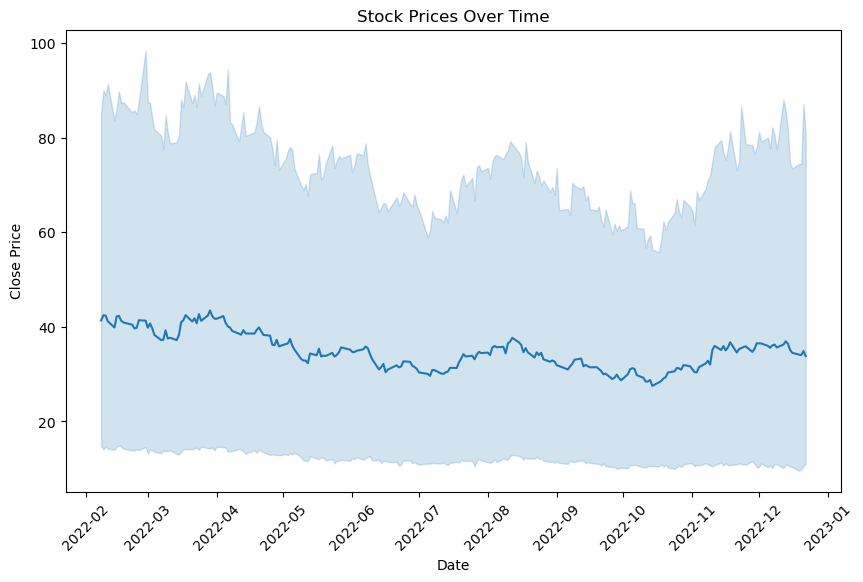

In [134]:
# Line Plot for stock prices over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='close', data=dfn)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [135]:
dfn['price_rise'] = np.where(dfn['close'] > dfn['close'].shift(), 1, 0)
monthly_price_rise = dfn.groupby('month')['price_rise'].mean()

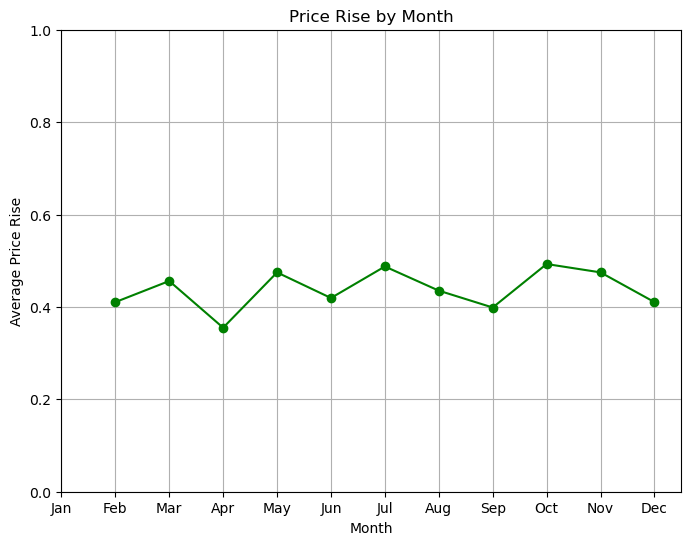

In [136]:
plt.figure(figsize=(8, 6))
monthly_price_rise.plot(kind='line', marker='o', color='green')
plt.title('Price Rise by Month')
plt.xlabel('Month')
plt.ylabel('Average Price Rise')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [137]:
dfn['day_of_week'] = dfn['date'].dt.dayofweek
dfn['price_rise_dayofweek'] = np.where(dfn['close'] > dfn['close'].shift(), 1, 0)
daily_price_rise = dfn.groupby('day_of_week')['price_rise_dayofweek'].mean()

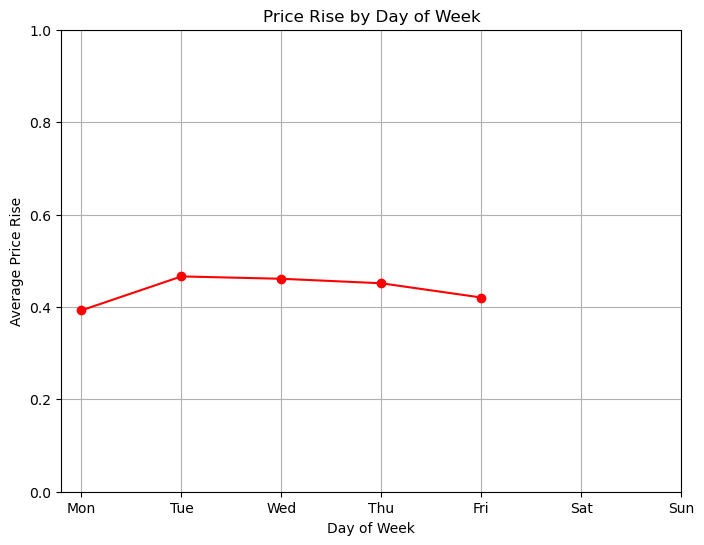

In [138]:
plt.figure(figsize=(8, 6))
daily_price_rise.plot(kind='line', marker='o', color='red')
plt.title('Price Rise by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price Rise')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylim(0, 1)
plt.grid(True)
plt.show()

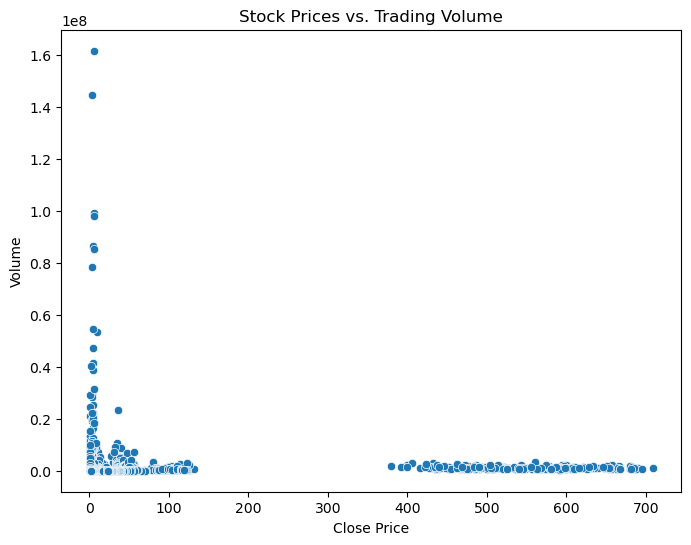

In [139]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='close', y='volume', data=dfn)
plt.title('Stock Prices vs. Trading Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

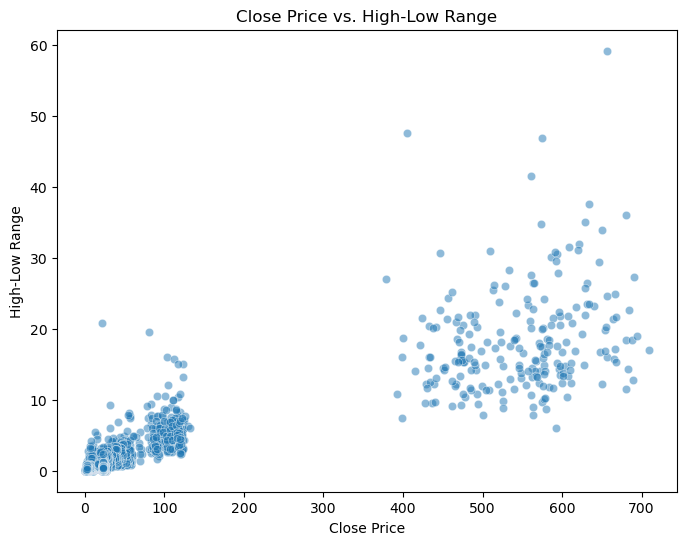

In [140]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='close', y='high_low_range', data=dfn, alpha=0.5)
plt.title('Close Price vs. High-Low Range')
plt.xlabel('Close Price')
plt.ylabel('High-Low Range')
plt.show()

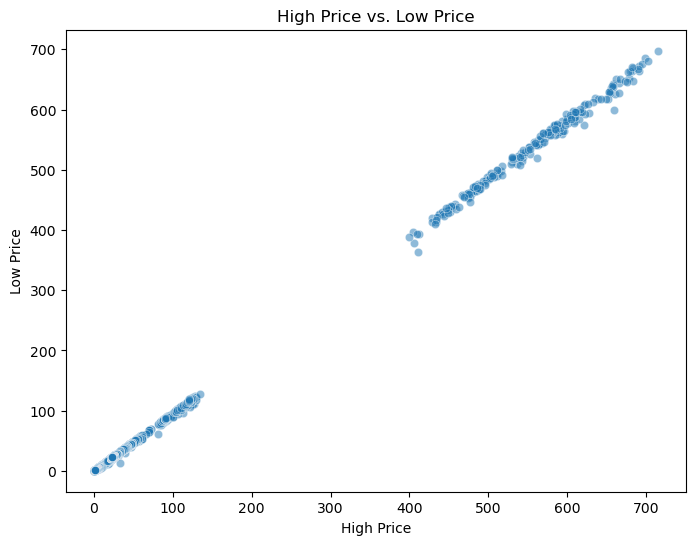

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='high', y='low', data=dfn, alpha=0.5)
plt.title('High Price vs. Low Price')
plt.xlabel('High Price')
plt.ylabel('Low Price')
plt.show()

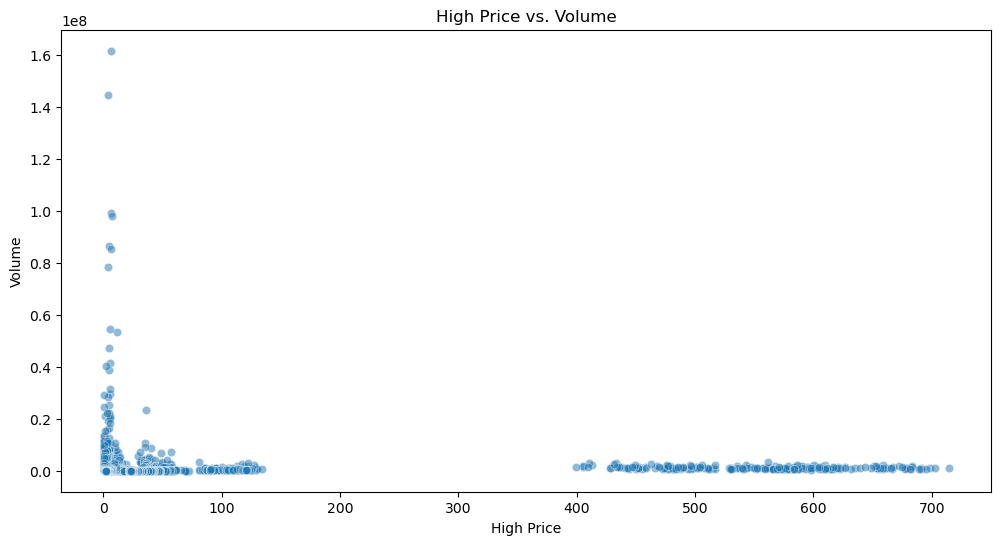

In [142]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='high', y='volume', data=dfn, alpha=0.5)
plt.title('High Price vs. Volume')
plt.xlabel('High Price')
plt.ylabel('Volume')
plt.show()

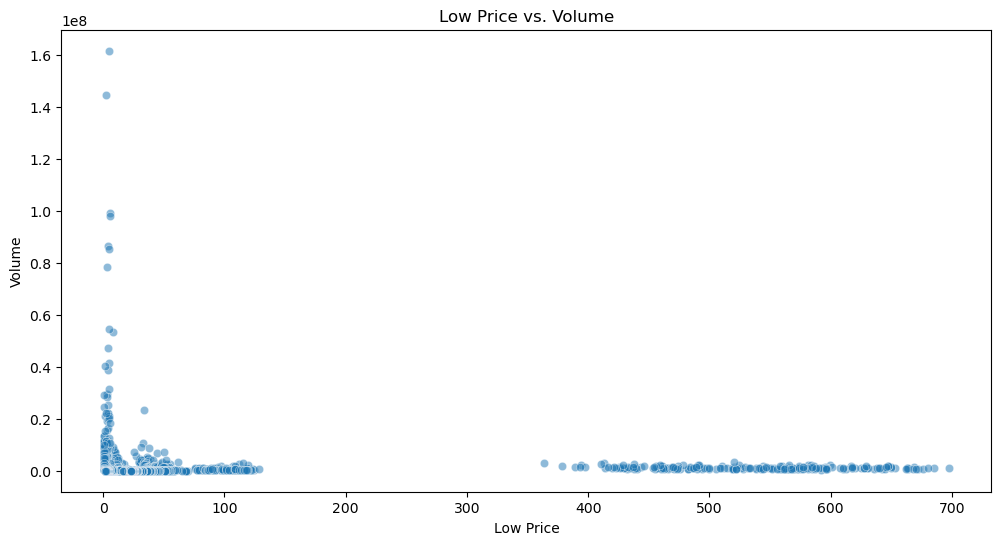

In [143]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='low', y='volume', data=dfn, alpha=0.5)
plt.title('Low Price vs. Volume')
plt.xlabel('Low Price')
plt.ylabel('Volume')
plt.show()

In [144]:
dfn

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,...,ma_50,ma_200,rsi,month,day,price_pct_change,volume_pct_change,price_rise,day_of_week,price_rise_dayofweek
0,2022-02-08,13.990000,14.800000,13.990000,14.740000,14.740000,123500,45.766446,-0.314072,13.250000,...,NaN,NaN,NaN,2,1,NaN,NaN,0,1,0
1,2022-02-09,15.090000,15.479000,14.880000,14.980000,14.980000,99300,48.611972,-0.233571,13.250000,...,NaN,NaN,NaN,2,2,0.016282,-0.195951,1,2,1
2,2022-02-10,14.490000,15.280000,14.460000,15.270000,15.270000,126900,51.880607,-0.147343,13.250000,...,NaN,NaN,NaN,2,3,0.019359,0.277946,1,3,1
3,2022-02-11,15.270000,15.361000,14.772000,15.060000,15.060000,71500,49.440705,-0.093490,13.450000,...,NaN,NaN,NaN,2,4,-0.013752,-0.436564,0,4,0
4,2022-02-14,15.000000,15.360000,14.590000,14.820000,14.820000,62900,46.748598,-0.067796,13.990000,...,NaN,NaN,NaN,2,0,-0.015936,-0.120280,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,2022-12-16,22.700001,22.879999,22.500000,22.670000,22.095634,13800,45.827378,0.096888,22.500000,...,22.6444,22.85065,50.505062,12,4,-0.005702,0.243243,0,4,0
6637,2022-12-19,22.600000,22.799999,22.379999,22.600000,22.027409,144600,44.016221,0.063290,22.379999,...,22.6538,22.84360,46.428585,12,0,-0.003088,9.478261,0,0,0
6638,2022-12-20,22.600000,23.000000,22.600000,22.840000,22.261328,21000,51.113614,0.054906,22.379999,...,22.6676,22.83905,48.529424,12,1,0.010619,-0.854772,1,1,1
6639,2022-12-21,22.889999,23.389999,22.889999,23.309999,22.719419,9600,61.385254,0.084254,22.379999,...,22.6898,22.83705,55.508482,12,2,0.020578,-0.542857,1,2,1


In [145]:
dfn.describe()

,date,open,high,low,close,adjclose,volume,RSIadjclose15,MACDadjclose15,low-5,...,ma_50,ma_200,rsi,month,day,price_pct_change,volume_pct_change,price_rise,day_of_week,price_rise_dayofweek
count,6641,6641.000000,6641.000000,6641.000000,6641.000000,6641.000000,6.641000e+03,6641.000000,6641.000000,6641.000000,...,6592.000000,6442.000000,6628.000000,6641.000000,6641.000000,6640.000000,6603.000000,6641.000000,6641.000000,6641.000000
mean,2022-07-16 22:56:02.023791616,34.871144,35.550297,34.195229,34.861711,34.395839,8.012501e+05,47.172440,-0.249400,33.144039,...,34.978292,35.345604,47.370763,7.025297,2.029212,0.094864,inf,0.439542,2.029212,0.439542
min,2022-02-08 00:00:00,0.420000,0.436000,0.405000,0.408000,0.408000,0.000000e+00,15.162486,-26.286540,0.405000,...,0.522640,1.679815,0.000000,2.000000,0.000000,-0.801085,-1.000000,0.000000,0.000000,0.000000
25%,2022-04-28 00:00:00,3.950000,4.000000,3.890000,3.940000,3.850621,1.225000e+04,39.601718,-0.259312,3.800000,...,4.082750,6.060494,35.108870,4.000000,1.000000,-0.020512,-0.347877,0.000000,1.000000,0.000000
50%,2022-07-19 00:00:00,9.980000,10.035000,9.920000,9.970000,9.960000,9.530000e+04,46.591228,-0.055557,9.700000,...,10.004000,10.638688,46.666665,7.000000,2.000000,0.000000,-0.024242,0.000000,2.000000,0.000000
75%,2022-10-05 00:00:00,24.371000,24.510000,24.110001,24.260000,22.507221,7.054000e+05,54.227814,0.064264,23.850000,...,24.277650,24.092344,59.322994,10.000000,3.000000,0.016090,0.491746,1.000000,3.000000,1.000000
max,2022-12-22 00:00:00,710.000000,714.619995,697.669983,709.140015,696.589844,1.615550e+08,96.365095,38.216480,667.500000,...,640.923597,542.075599,100.000000,12.000000,4.000000,501.669227,inf,1.000000,4.000000,1.000000
std,NaN,98.179058,99.816336,96.529301,98.224111,97.138105,4.211974e+06,11.088617,3.362540,93.436940,...,93.875042,83.361769,18.427923,3.037808,1.389631,6.230547,NaN,0.496369,1.389631,0.496369


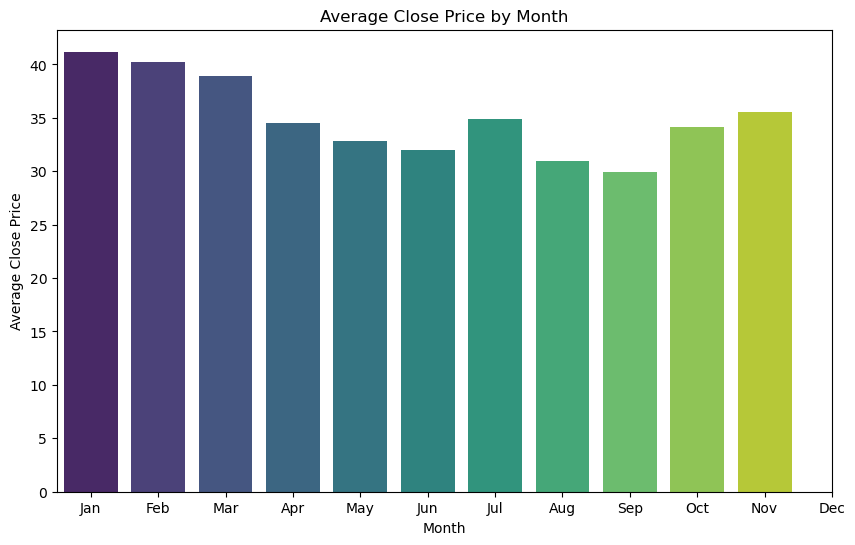

In [146]:
monthly_avg_close = dfn.groupby('month')['close'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='close', data=monthly_avg_close, palette='viridis')
plt.title('Average Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

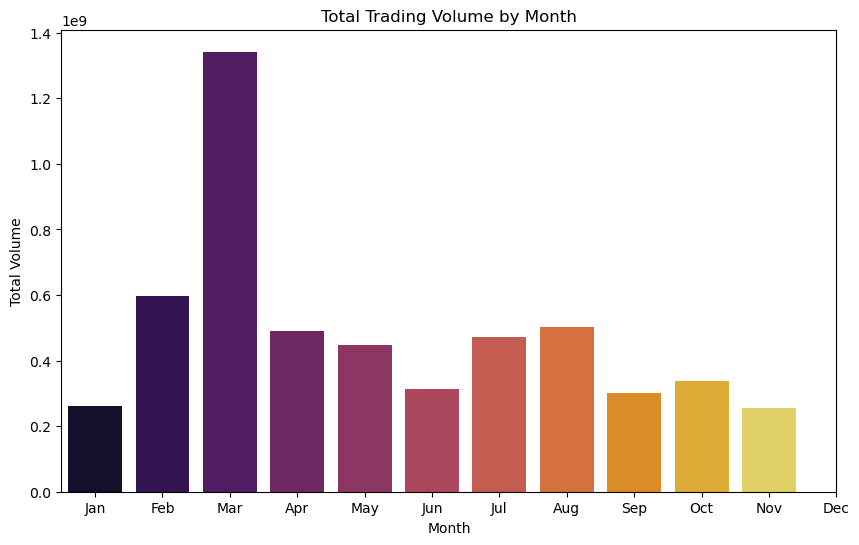

In [147]:
monthly_total_volume = dfn.groupby('month')['volume'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='volume', data=monthly_total_volume, palette='inferno')
plt.title('Total Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

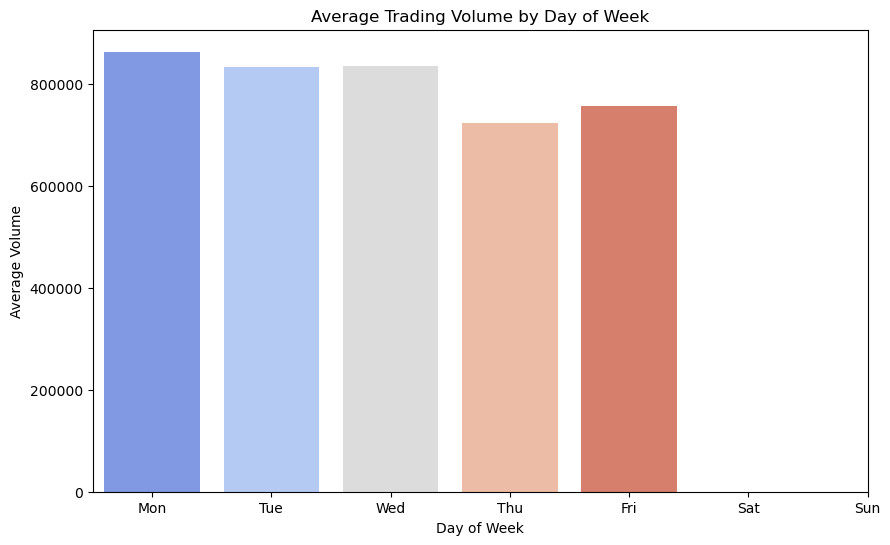

In [148]:
daily_avg_volume = dfn.groupby('day_of_week')['volume'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='volume', data=daily_avg_volume, palette='coolwarm')
plt.title('Average Trading Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Volume')
plt.xticks(np.arange(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

D:\Users\SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


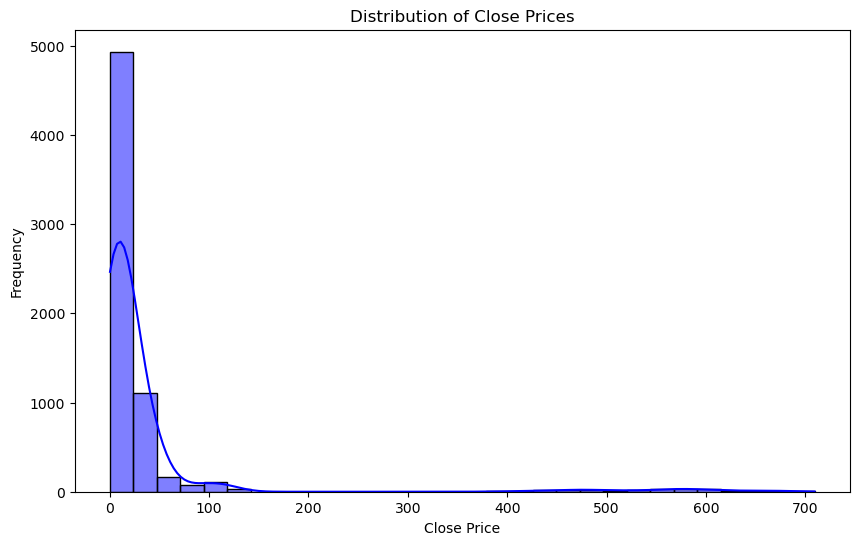

In [149]:
plt.figure(figsize=(10, 6))
sns.histplot(dfn['close'], bins=30, kde=True, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

D:\Users\SAI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


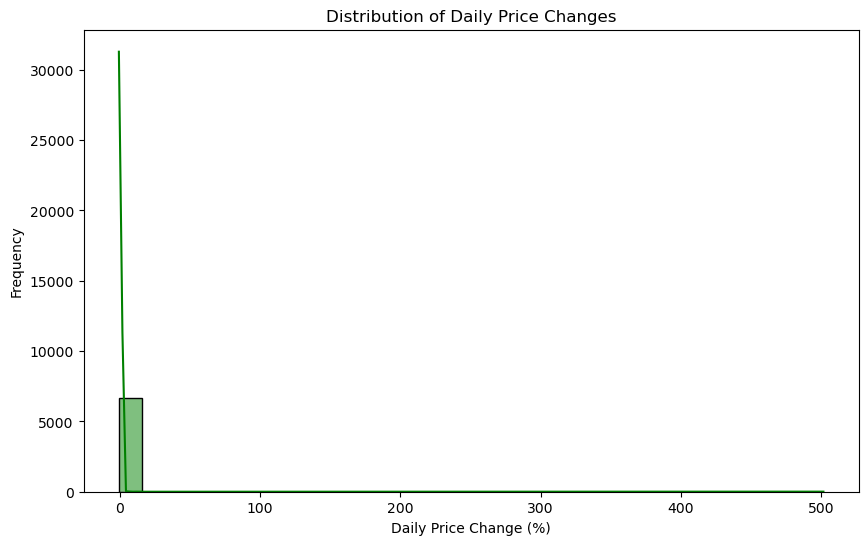

In [150]:
dfn['daily_price_change'] = dfn['close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(dfn['daily_price_change'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Price Change (%)')
plt.ylabel('Frequency')
plt.show()

In [151]:
required_columns= [
    'open', 'high', 'low', 'close', 'adjclose', 'volume',
    'RSIadjclose15', 'MACDadjclose15', 'stochastic-k-5', 'volumenrelativo',
    'low-5', 'high-5', 'diff', 'INCREMENTO', 'TARGET'
]

In [152]:
correlation_matrix = dfn[required_columns].corr()

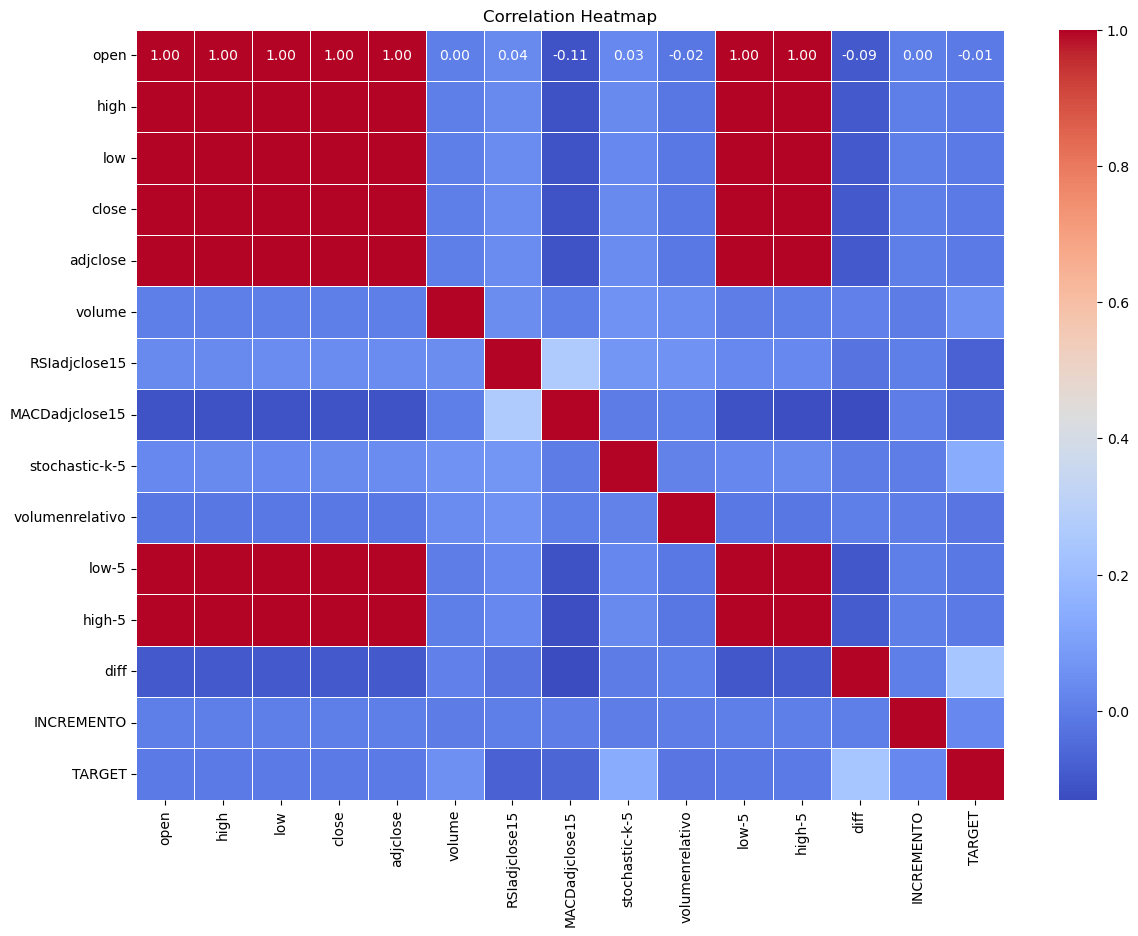

In [153]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [154]:
price_related_columns = ['open', 'high', 'low', 'close', 'adjclose']

In [155]:
price_correlation_matrix = dfn[price_related_columns].corr()

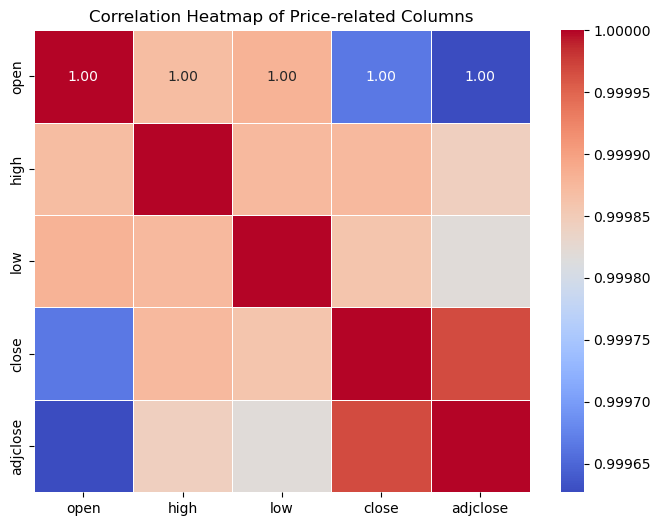

In [156]:
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Price-related Columns')
plt.show()

In [157]:
volume_momentum_columns = ['volume', 'RSIadjclose15', 'MACDadjclose15', 'stochastic-k-5', 'volumenrelativo']

In [158]:
volume_momentum_correlation_matrix = dfn[volume_momentum_columns].corr()

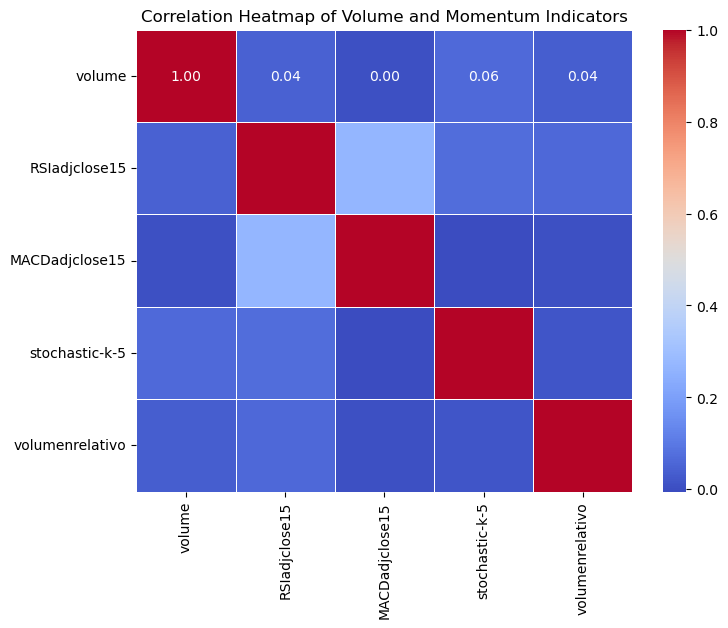

In [159]:
plt.figure(figsize=(8, 6))
sns.heatmap(volume_momentum_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Volume and Momentum Indicators')
plt.show()

In [160]:
derived_columns = ['low-5', 'high-5', 'diff', 'INCREMENTO', 'TARGET']

In [161]:
derived_correlation_matrix = dfn[derived_columns].corr()

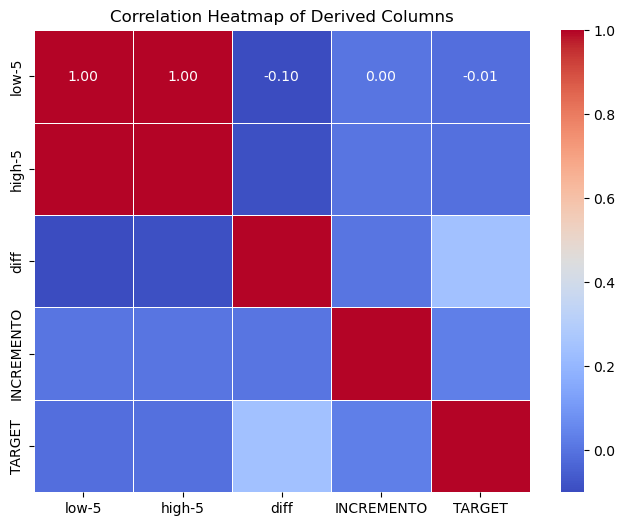

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(derived_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Derived Columns')
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [164]:
print(dfn.head())
print(dfn.info())

        date   open    high     low  close  adjclose  volume  RSIadjclose15  \
0 2022-02-08  13.99  14.800  13.990  14.74     14.74  123500      45.766446   
1 2022-02-09  15.09  15.479  14.880  14.98     14.98   99300      48.611972   
2 2022-02-10  14.49  15.280  14.460  15.27     15.27  126900      51.880607   
3 2022-02-11  15.27  15.361  14.772  15.06     15.06   71500      49.440705   
4 2022-02-14  15.00  15.360  14.590  14.82     14.82   62900      46.748598   

   MACDadjclose15  low-5  ...  ma_200  rsi  month  day  price_pct_change  \
0       -0.314072  13.25  ...     NaN  NaN      2    1               NaN   
1       -0.233571  13.25  ...     NaN  NaN      2    2          0.016282   
2       -0.147343  13.25  ...     NaN  NaN      2    3          0.019359   
3       -0.093490  13.45  ...     NaN  NaN      2    4         -0.013752   
4       -0.067796  13.99  ...     NaN  NaN      2    0         -0.015936   

   volume_pct_change  price_rise  day_of_week  price_rise_dayofweek 

In [165]:
# Dropping 'date' and 'TARGET' columns, keeping 'close' as the target variable
features_to_exclude = ['date', 'close', 'TARGET']
X = dfn.drop(columns=features_to_exclude)
y = dfn['close']

In [166]:
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

In [167]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [168]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [170]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 5312 samples
Testing set size: 1329 samples


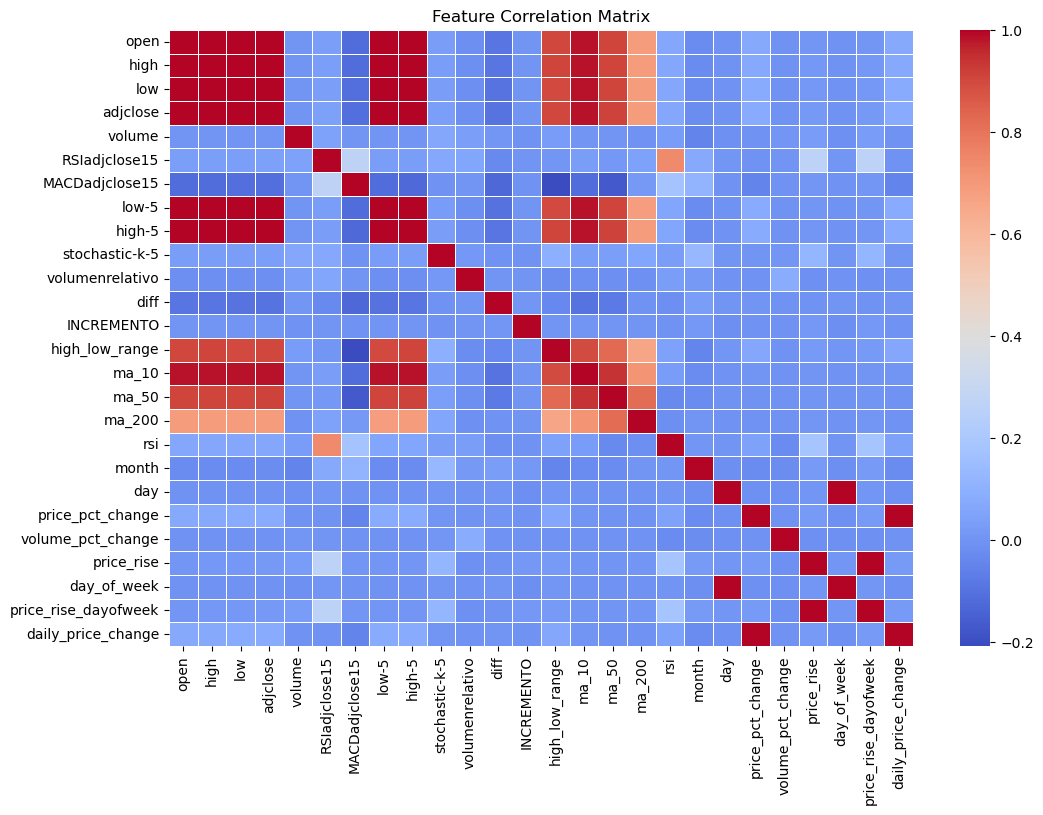

Highly correlated features (correlation > 0.8): [('open', 'high'), ('open', 'low'), ('open', 'adjclose'), ('open', 'low-5'), ('open', 'high-5'), ('open', 'high_low_range'), ('open', 'ma_10'), ('open', 'ma_50'), ('high', 'low'), ('high', 'adjclose'), ('high', 'low-5'), ('high', 'high-5'), ('high', 'high_low_range'), ('high', 'ma_10'), ('high', 'ma_50'), ('low', 'adjclose'), ('low', 'low-5'), ('low', 'high-5'), ('low', 'high_low_range'), ('low', 'ma_10'), ('low', 'ma_50'), ('adjclose', 'low-5'), ('adjclose', 'high-5'), ('adjclose', 'high_low_range'), ('adjclose', 'ma_10'), ('adjclose', 'ma_50'), ('low-5', 'high-5'), ('low-5', 'high_low_range'), ('low-5', 'ma_10'), ('low-5', 'ma_50'), ('high-5', 'high_low_range'), ('high-5', 'ma_10'), ('high-5', 'ma_50'), ('high_low_range', 'ma_10'), ('high_low_range', 'ma_50'), ('ma_10', 'ma_50'), ('ma_50', 'ma_200'), ('day', 'day_of_week'), ('price_pct_change', 'daily_price_change'), ('price_rise', 'price_rise_dayofweek')]


In [171]:
corr_matrix = pd.DataFrame(X).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

threshold = 0.8
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(f"Highly correlated features (correlation > {threshold}): {high_corr_var}")


In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE

In [173]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [174]:
select_k_best = SelectKBest(score_func=f_regression, k=10)
X_new = select_k_best.fit_transform(X_imputed, y)

selected_features = select_k_best.get_support(indices=True)
print(f"Selected features indices: {selected_features}")

selected_feature_names = [X.columns[i] for i in selected_features]
print(f"Selected features names: {selected_feature_names}")

Selected features indices: [ 0  1  2  3  7  8 13 14 15 16]
Selected features names: ['open', 'high', 'low', 'adjclose', 'low-5', 'high-5', 'high_low_range', 'ma_10', 'ma_50', 'ma_200']


In [175]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

rfe_lr = RFE(estimator=model_lr, n_features_to_select=10)
X_rfe_lr = rfe_lr.fit_transform(X_imputed, y)

selected_rfe_features_lr = rfe_lr.get_support(indices=True)
print(f"Selected features indices from RFE with Linear Regression: {selected_rfe_features_lr}")

selected_rfe_feature_names_lr = [X.columns[i] for i in selected_rfe_features_lr]
print(f"Selected features names from RFE with Linear Regression: {selected_rfe_feature_names_lr}")

Selected features indices from RFE with Linear Regression: [ 0  1  2  3  6  8 13 18 22 24]
Selected features names from RFE with Linear Regression: ['open', 'high', 'low', 'adjclose', 'MACDadjclose15', 'high-5', 'high_low_range', 'month', 'price_rise', 'price_rise_dayofweek']


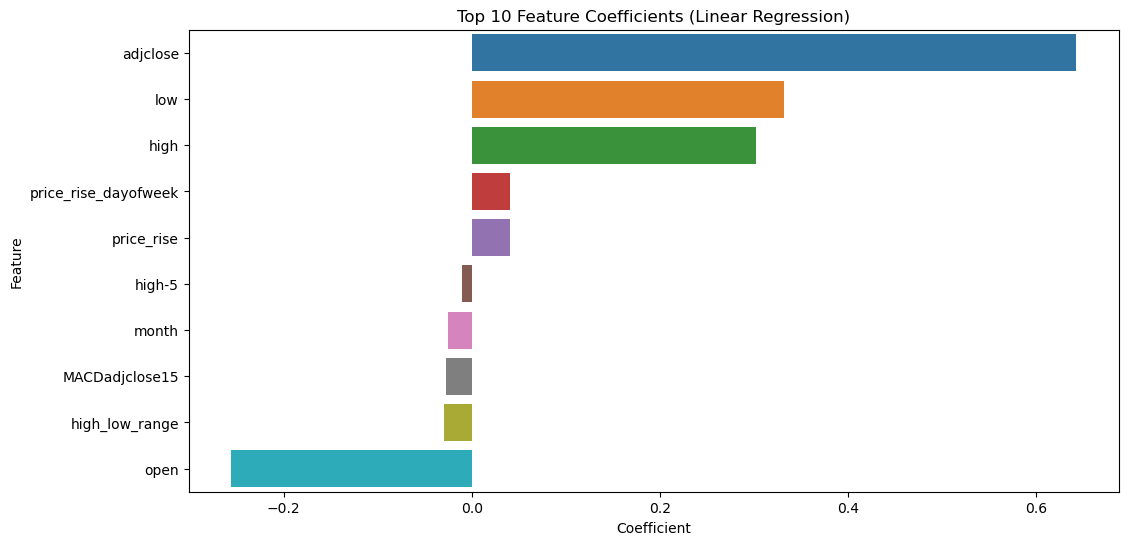

Top 10 important features based on coefficients (Linear Regression): ['adjclose', 'low', 'high', 'price_rise_dayofweek', 'price_rise', 'high-5', 'month', 'MACDadjclose15', 'high_low_range', 'open']


In [176]:
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe_lr, y, test_size=0.2, random_state=42)

model_lr.fit(X_train_rfe, y_train)


coefficients_lr = model_lr.coef_


feature_coefficients_lr = pd.DataFrame({'Feature': selected_rfe_feature_names_lr, 'Coefficient': coefficients_lr})
feature_coefficients_lr = feature_coefficients_lr.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients_lr)
plt.title('Top 10 Feature Coefficients (Linear Regression)')
plt.show()

top_features_lr = feature_coefficients_lr['Feature'].tolist()
print(f"Top 10 important features based on coefficients (Linear Regression): {top_features_lr}")

In [177]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [178]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

In [179]:
model_lr.fit(X_train_rfe, y_train)
model_rf.fit(X_train_rfe, y_train)
model_gb.fit(X_train_rfe, y_train)

GradientBoostingRegressor(random_state=42)

In [180]:
y_pred_lr = model_lr.predict(X_test_rfe)
y_pred_rf = model_rf.predict(X_test_rfe)
y_pred_gb = model_gb.predict(X_test_rfe)

In [181]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [182]:
print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}")
print(f"Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}")

Linear Regression - MSE: 0.3205052279955705, R2: 0.9999644014770294
Random Forest Regressor - MSE: 0.45440190651868256, R2: 0.9999495295698974
Gradient Boosting Regressor - MSE: 0.5136397510878387, R2: 0.9999429500211523


In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import joblib

model_lr = LinearRegression()

rfe_lr = RFE(estimator=model_lr, n_features_to_select=10)
X_rfe_lr = rfe_lr.fit_transform(X_imputed, y)

X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe_lr, y, test_size=0.2, random_state=42)


model_lr.fit(X_train_rfe, y_train)

joblib.dump(model_lr, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [184]:
from sklearn.metrics import mean_squared_error, r2_score
import joblib


model_lr = joblib.load('linear_regression_model.pkl')

y_pred = model_lr.predict(X_test_rfe)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Mean Squared Error (MSE): 0.3205052279955705
R-squared (R²): 0.9999644014770294
Actual: 11.68000030517578, Predicted: 11.840230464212393
Actual: 3.400000095367432, Predicted: 3.324029622984547
Actual: 5.929999828338623, Predicted: 6.22848082624111
Actual: 10.279999732971191, Predicted: 10.518215292264118
Actual: 5.039999961853027, Predicted: 5.210073519126118
Actual: 1.3300000429153442, Predicted: 1.3399793627447971
Actual: 7.190000057220459, Predicted: 7.4136297882725195
Actual: 34.349998474121094, Predicted: 34.657825032437685
Actual: 4.449999809265137, Predicted: 4.651770414878542
Actual: 25.049999237060547, Predicted: 23.567043675487145
